In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('../data/make_it_easy.csv')

In [4]:
df

feature_1  feature_2  feature_3 label
0           2.5       0.00         58     B
1           2.5       0.02         61     B
2           2.5       0.05         33     B
3           2.5       0.07         89     B
4           2.5       0.10         58     B
...         ...        ...        ...   ...
1253        2.0      -0.09         30     A
1254        2.0      -0.07         41     A
1255        2.0      -0.05         30     A
1256        2.0      -0.03          3     A
1257        2.0      -0.01         36     A

[1258 rows x 4 columns]

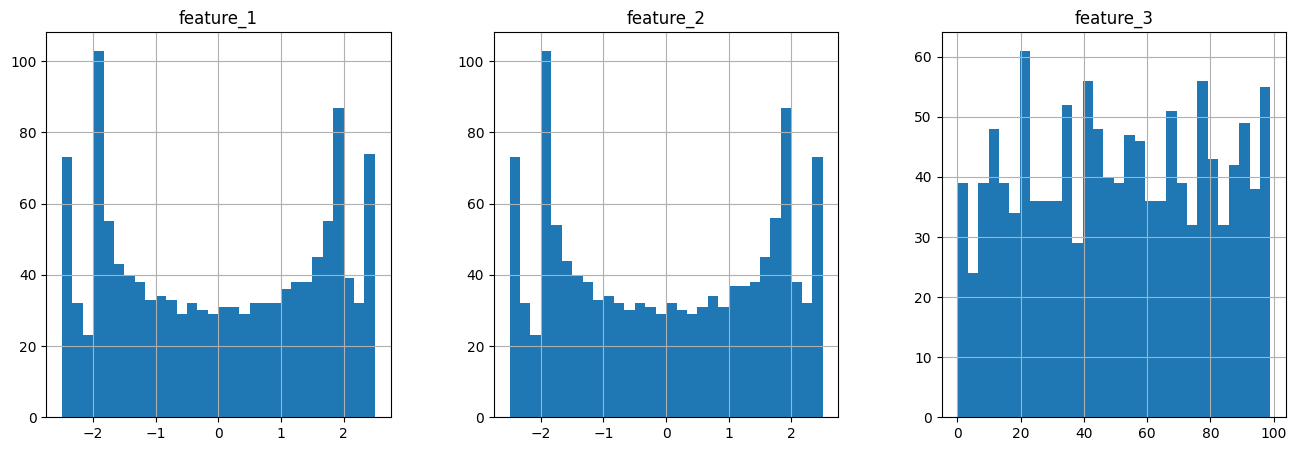

In [ ]:
df.hist(bins=30, layout=(1,3), figsize=(16,5));

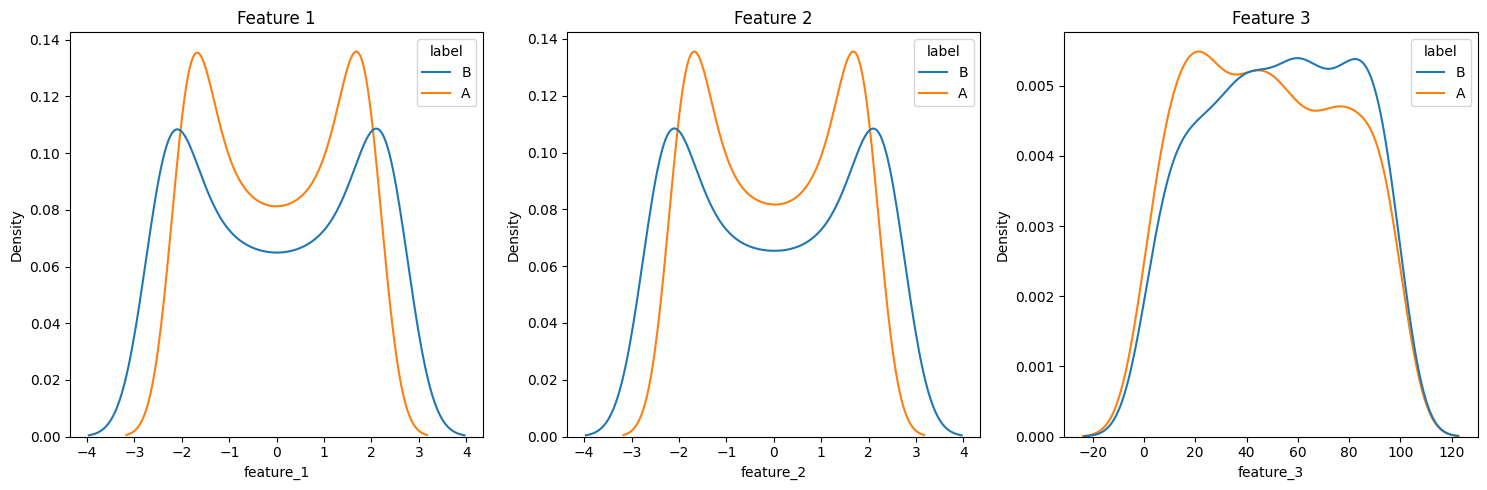

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# График плотности распределения для признака feature_1
sns.kdeplot(data=df, x="feature_1", hue="label", ax=axes[0])
axes[0].set_title("Feature 1")

# График плотности распределения для признака feature_2
sns.kdeplot(data=df, x="feature_2", hue="label", ax=axes[1])
axes[1].set_title("Feature 2")

# График плотности распределения для признака feature_3
sns.kdeplot(data=df, x="feature_3", hue="label", ax=axes[2])
axes[2].set_title("Feature 3")

plt.tight_layout()
plt.show()

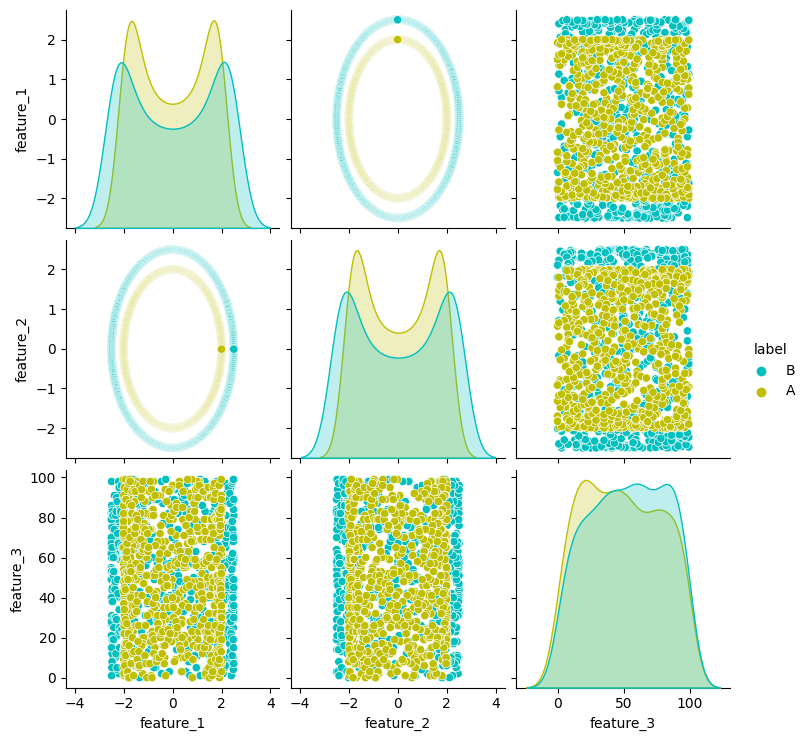

In [ ]:
palette = {'A': "y", 'B': "c"} # тут можно попробовать разные цвета
sns.pairplot(df[['feature_1', 'feature_2', 'feature_3', 'label']], hue="label", palette=palette)
plt.show();

In [ ]:
data = df.copy()

# Создаём полиномиальные признаки
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[["feature_1", "feature_2", "feature_3"]])

# Добавляем полиномиальные признаки к копии исходных данных
poly_data = pd.concat([data, pd.DataFrame(poly_features)], axis=1)

In [ ]:
poly_data

feature_1  feature_2  feature_3 label    0     1     2     3      4  \
0           2.5       0.00         58     B  2.5  0.00  58.0  6.25  0.000   
1           2.5       0.02         61     B  2.5  0.02  61.0  6.25  0.050   
2           2.5       0.05         33     B  2.5  0.05  33.0  6.25  0.125   
3           2.5       0.07         89     B  2.5  0.07  89.0  6.25  0.175   
4           2.5       0.10         58     B  2.5  0.10  58.0  6.25  0.250   
...         ...        ...        ...   ...  ...   ...   ...   ...    ...   
1253        2.0      -0.09         30     A  2.0 -0.09  30.0  4.00 -0.180   
1254        2.0      -0.07         41     A  2.0 -0.07  41.0  4.00 -0.140   
1255        2.0      -0.05         30     A  2.0 -0.05  30.0  4.00 -0.100   
1256        2.0      -0.03          3     A  2.0 -0.03   3.0  4.00 -0.060   
1257        2.0      -0.01         36     A  2.0 -0.01  36.0  4.00 -0.020   

          5       6     7       8  
0     145.0  0.0000  0.00  3364.0  
1     152.5  0.0004  1.22  3721.0  
2      82.5  0.0025  1.65  1089.0  
3     222.5  0.0049  6.23  7921.0  
4     145.0  0.0100  5.80  3364.0  
...     ...     ...   ...     ...  
1253   60.0  0.0081 -2.70   900.0  
1254   82.0  0.0049 -2.87  1681.0  
1255   60.0  0.0025 -1.50   900.0  
1256    6.0  0.0009 -0.09     9.0  
1257   72.0  0.0001 -0.36  1296.0  

[1258 rows x 13 columns]

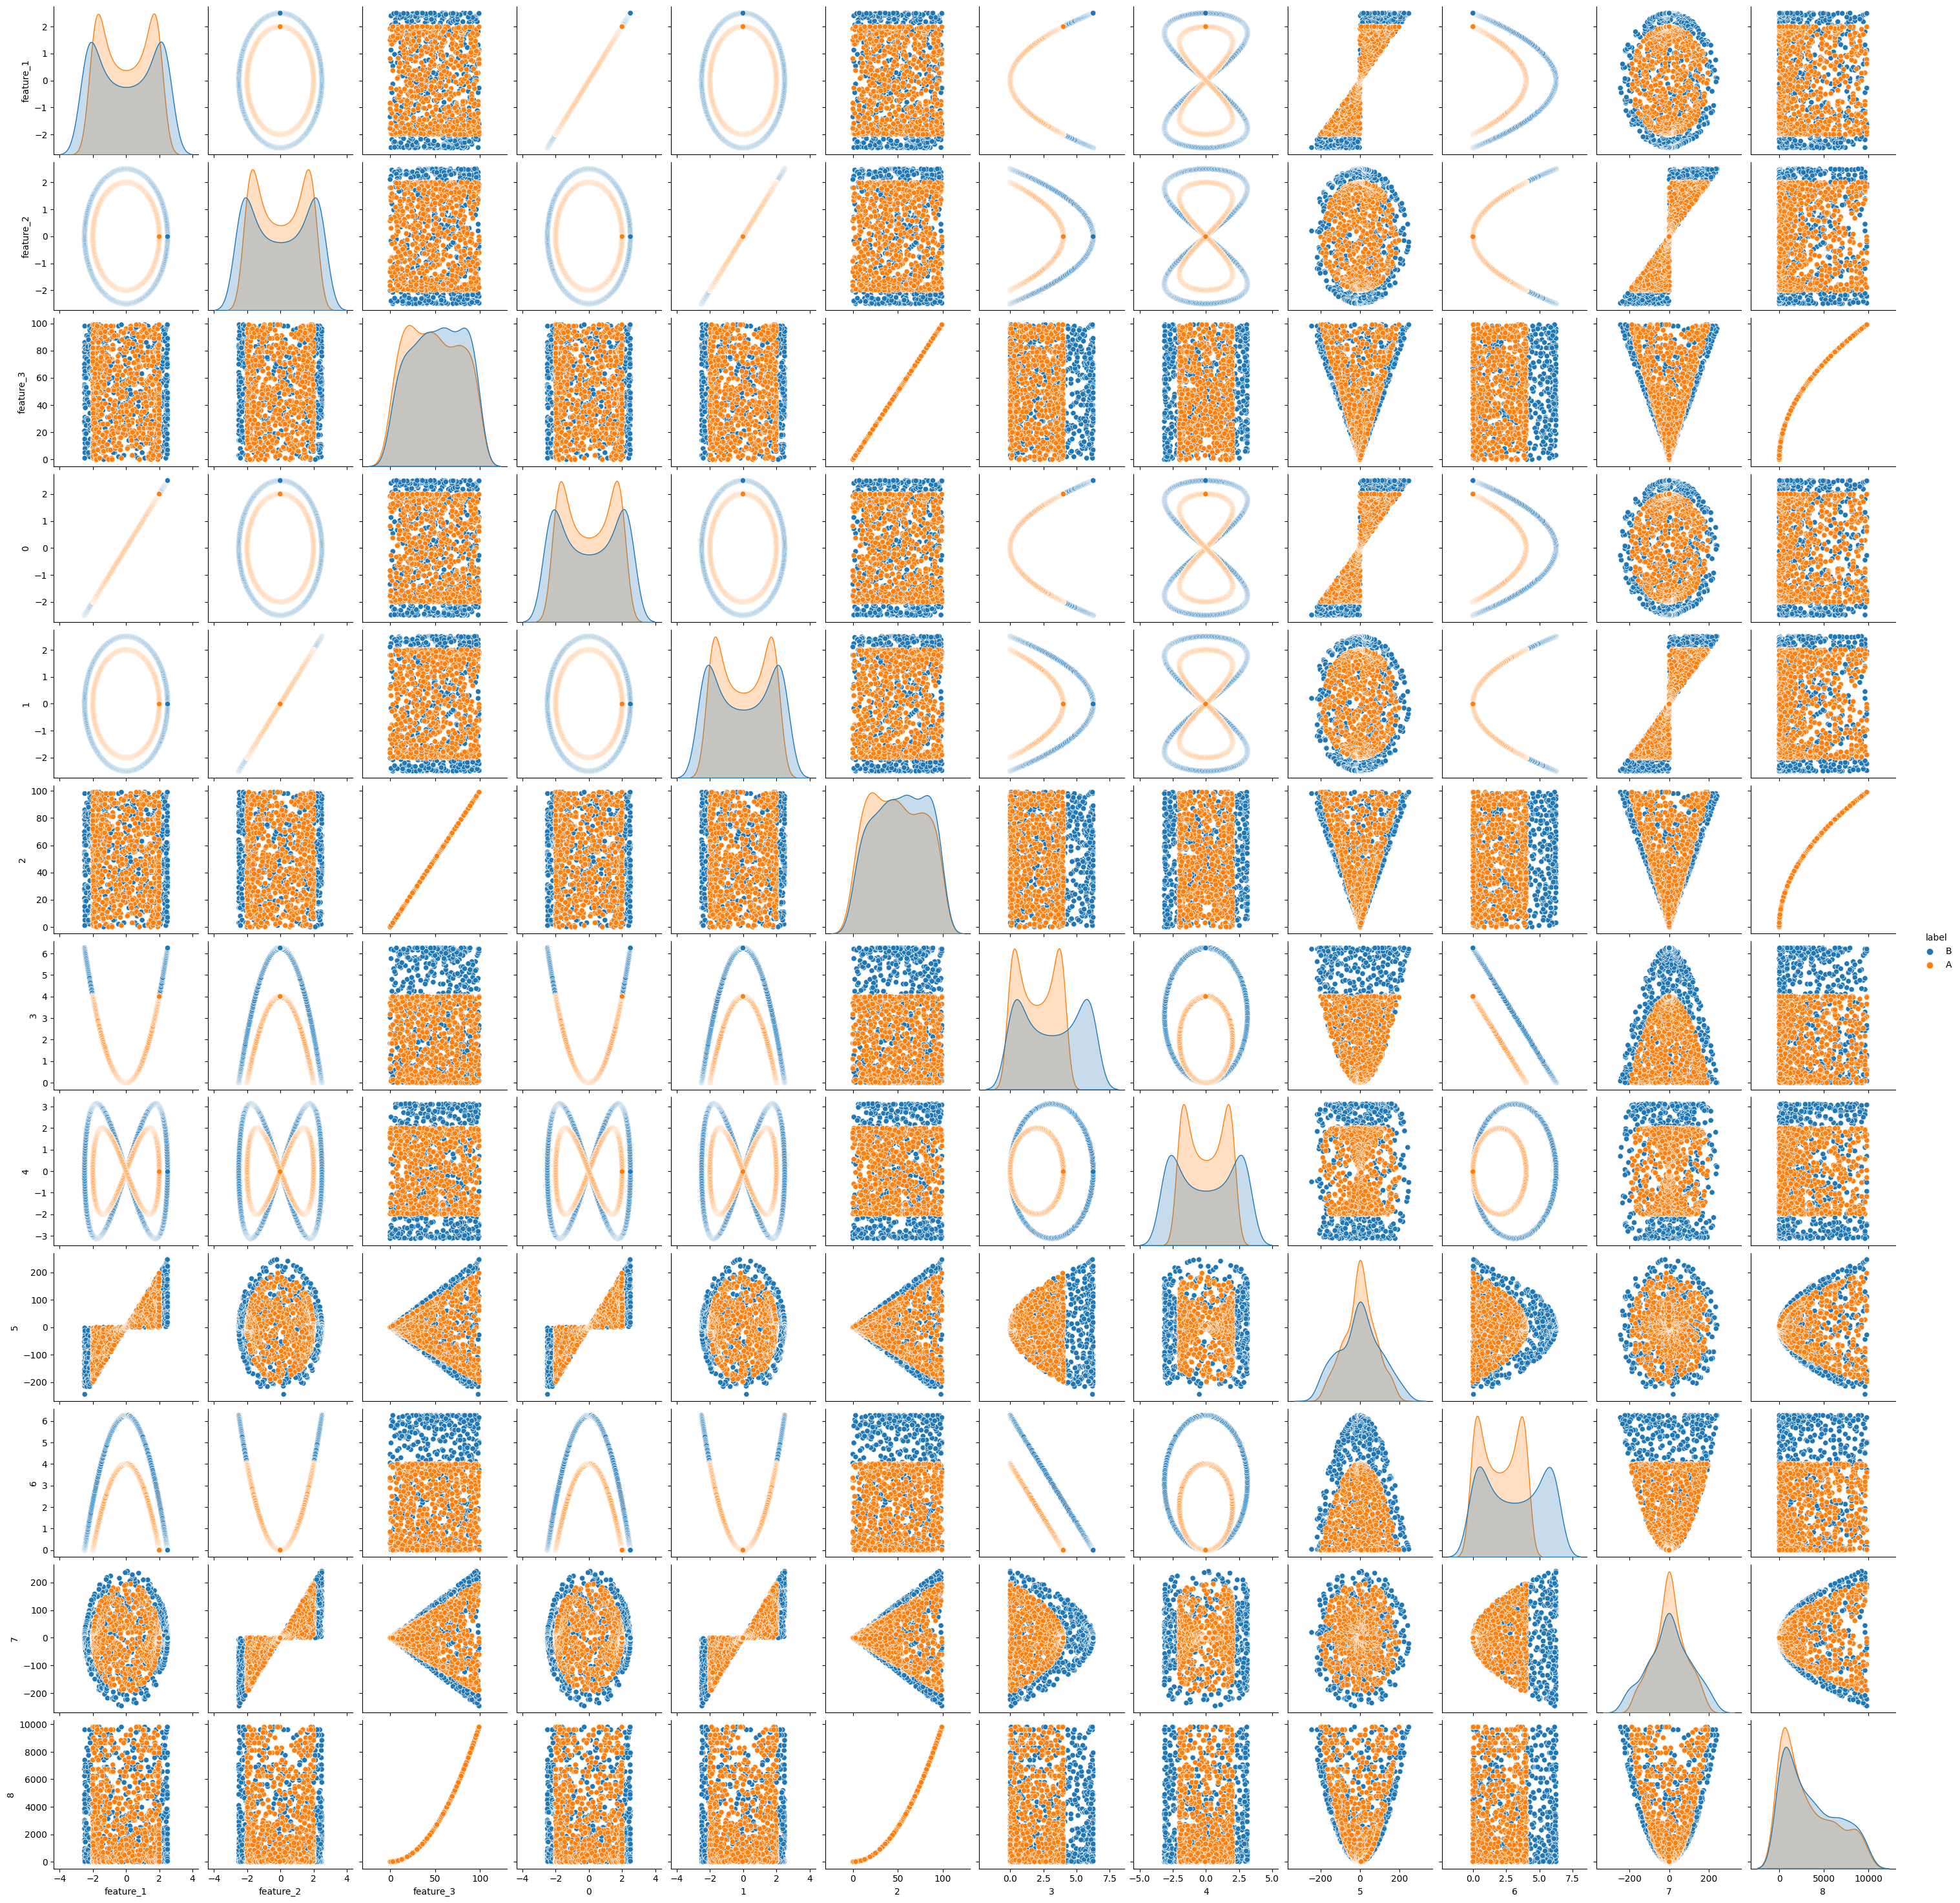

In [ ]:
# Выводим парные графики между всеми признаками
sns.pairplot(poly_data, hue="label")
plt.show()